<a href="https://colab.research.google.com/github/N1sChaLLL/ML_LAB/blob/main/assign7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Question 1
def summation_unit(inputs, weights):
    """
        Summation Unit: Computes the weighted sum of inputs and weights.

        Parameters:
            inputs (list of float): List of input values.
            weights (list of float): List of corresponding weights.

        Returns:
            float: The weighted sum.
    """
    return sum(i * w for i, w in zip(inputs, weights))

In [ ]:
import math

# Step Function
def step_activation(x):
    """
    Step Activation Function: Returns 1 if x >= 0, otherwise 0.

    Parameters:
        x (float): Input value.

    Returns:
        int: 1 if x >= 0, else 0.
    """
    return 1 if x >= 0 else 0

# Bipolar Step Function
def bipolar_step_activation(x):
    """
    Bipolar Step Activation Function: Returns 1 if x >= 0, otherwise -1.

    Parameters:
        x (float): Input value.

    Returns:
        int: 1 if x >= 0, else -1.
    """
    return 1 if x >= 0 else -1

# Sigmoid Function
def sigmoid_activation(x):
    """
    Sigmoid Activation Function: Applies the sigmoid function to x.

    Parameters:
        x (float): Input value.

    Returns:
        float: Sigmoid of x.
    """
    return 1 / (1 + math.exp(-x))

# TanH Function
def tanh_activation(x):
    """
    TanH Activation Function: Applies the hyperbolic tangent function to x.

    Parameters:
        x (float): Input value.

    Returns:
        float: TanH of x.
    """
    return math.tanh(x)

# ReLU Function
def relu_activation(x):
    """
    ReLU Activation Function: Returns the maximum of 0 and x.

    Parameters:
        x (float): Input value.

    Returns:
        float: ReLU of x.
    """
    return max(0, x)

# Leaky ReLU Function
def leaky_relu_activation(x, alpha=0.01):
    """
    Leaky ReLU Activation Function: Returns x if x > 0, otherwise alpha * x.

    Parameters:
        x (float): Input value.
        alpha (float, optional): Slope for negative x values. Default is 0.01.

    Returns:
        float: Leaky ReLU of x.
    """
    return x if x > 0 else alpha * x


In [ ]:
def mean_squared_error(y_true, y_pred):
    """
    Mean Squared Error (MSE) Comparator Unit.

    Parameters:
        y_true (list of float): True output values.
        y_pred (list of float): Predicted output values.

    Returns:
        float: MSE between true and predicted values.
    """
    return sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred)) / len(y_true)

def mean_absolute_error(y_true, y_pred):
    """
    Mean Absolute Error (MAE) Comparator Unit.

    Parameters:
        y_true (list of float): True output values.
        y_pred (list of float): Predicted output values.

    Returns:
        float: MAE between true and predicted values.
    """
    return sum(abs(true - pred) for true, pred in zip(y_true, y_pred)) / len(y_true)


In [ ]:
# Inputs and weights
inputs = [1.0, -2.0, 3.0]
weights = [0.5, -0.75, 0.25]

# 1. Summation
sum_output = summation_unit(inputs, weights)

# 2. Activation
sigmoid_output = sigmoid_activation(sum_output)

# 3. Error Calculation
y_true = [1, 0, 1]
y_pred = [0.8, 0.3, 0.9]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)


In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.046666666666666655
Mean Absolute Error: 0.19999999999999996


Converged at epoch 130


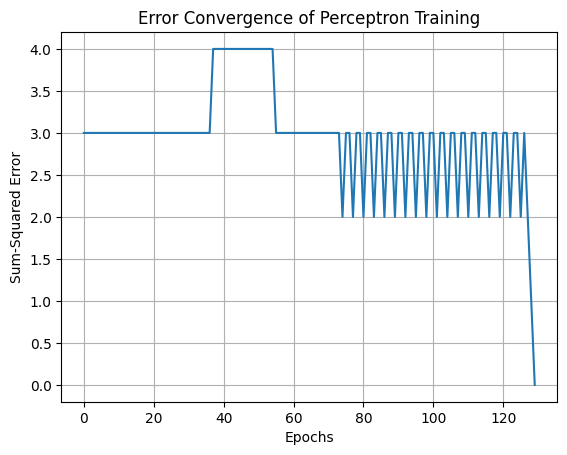

In [ ]:
#Question 2
import matplotlib.pyplot as plt

# Step Activation Function
def step_activation(x):
    """
    Step Activation Function: Returns 1 if x >= 0, otherwise 0.

    Parameters:
        x (float): Input value.

    Returns:
        int: 1 if x >= 0, else 0.
    """
    return 1 if x >= 0 else 0

# Summation Unit
def summation_unit(inputs, weights):
    """
    Summation Unit: Computes the weighted sum of inputs and weights.

    Parameters:
        inputs (list of float): List of input values.
        weights (list of float): List of corresponding weights.

    Returns:
        float: The weighted sum.
    """
    return sum(i * w for i, w in zip(inputs, weights))

# Perceptron Model
class Perceptron:
    def __init__(self, weights, learning_rate):
        """
        Initializes the perceptron with given weights and learning rate.

        Parameters:
            weights (list of float): Initial weights for the inputs.
            learning_rate (float): Learning rate (alpha) for the weight update.
        """
        self.weights = weights
        self.learning_rate = learning_rate

    def predict(self, inputs):
        """
        Predicts the output for the given inputs using the current weights.

        Parameters:
            inputs (list of float): Input values.

        Returns:
            int: The predicted binary output (0 or 1).
        """
        # Include the bias in the inputs
        weighted_sum = summation_unit([1] + inputs, self.weights)
        return step_activation(weighted_sum)

    def train(self, training_data, max_epochs=1000, error_threshold=0.002):
        """
        Trains the perceptron using the provided training data.

        Parameters:
            training_data (list of tuples): Training examples with input and expected output.
            max_epochs (int): Maximum number of epochs.
            error_threshold (float): Error threshold for convergence.

        Returns:
            list: A list of sum-squared errors for each epoch.
        """
        errors_per_epoch = []
        for epoch in range(max_epochs):
            sum_squared_error = 0
            for inputs, target in training_data:
                prediction = self.predict(inputs)
                error = target - prediction

                # Calculate the squared error for this instance
                sum_squared_error += error ** 2

                # Update the weights using the perceptron rule
                self.weights[0] += self.learning_rate * error * 1  # Bias term update
                for i in range(len(inputs)):
                    self.weights[i + 1] += self.learning_rate * error * inputs[i]

            # Record sum-squared-error for this epoch
            errors_per_epoch.append(sum_squared_error)

            # Check for convergence
            if sum_squared_error <= error_threshold:
                print(f"Converged at epoch {epoch + 1}")
                break

        return errors_per_epoch

# Example Usage
if __name__ == "__main__":
    # Initial weights [W0 (bias), W1, W2]
    weights = [10, 0.2, -0.75]
    learning_rate = 0.05

    # Create perceptron
    perceptron = Perceptron(weights, learning_rate)

    # Training data (inputs, target) - AND logic gate example
    training_data = [
        ([0, 0], 0),  # Input: (x1, x2), Target: y
        ([0, 1], 0),
        ([1, 0], 0),
        ([1, 1], 1),
    ]

    # Train the perceptron
    errors_per_epoch = perceptron.train(training_data, max_epochs=1000, error_threshold=0.002)

    # Plot the sum-squared-error over epochs
    plt.plot(errors_per_epoch)
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title('Error Convergence of Perceptron Training')
    plt.grid(True)
    plt.show()


Converged at epoch 130


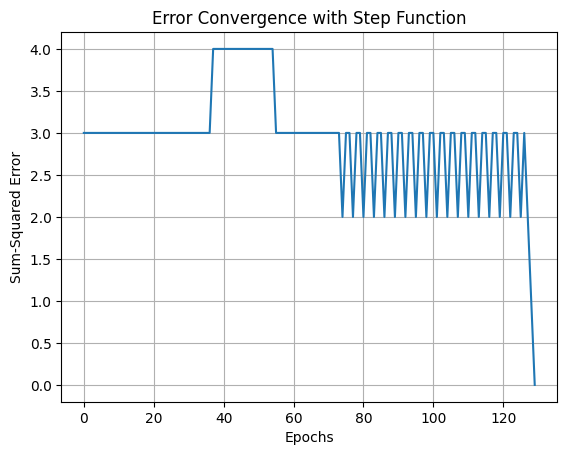

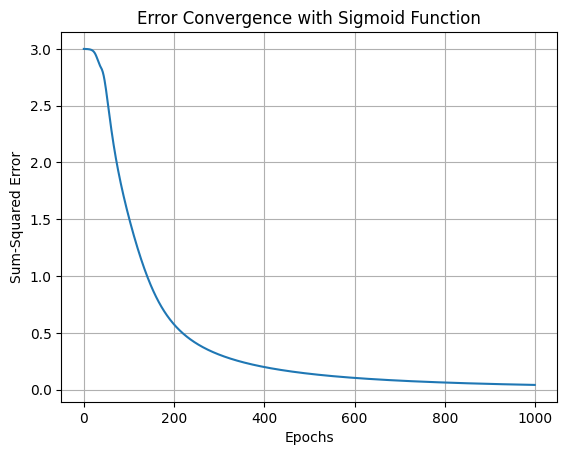

Converged at epoch 390


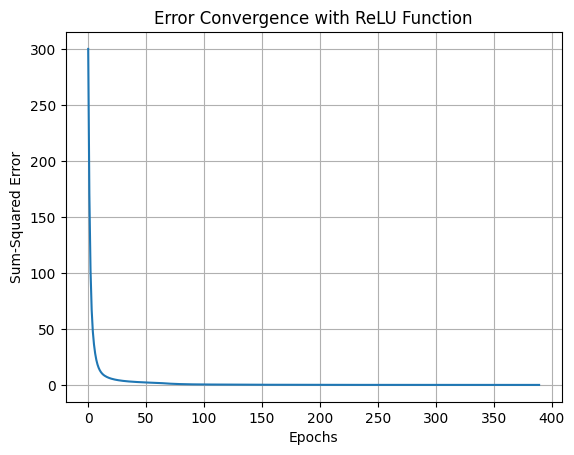

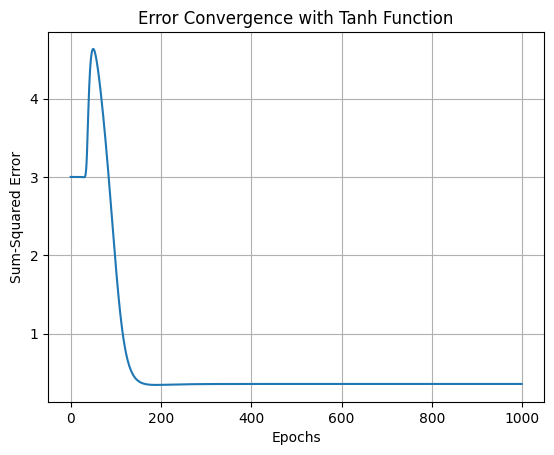

In [ ]:
#Question 3
import math
import matplotlib.pyplot as plt

# Activation Functions
def step_activation(x):
    """
    Step Activation Function: Returns 1 if x >= 0, otherwise 0.
    """
    return 1 if x >= 0 else 0

def sigmoid_activation(x):
    """
    Sigmoid Activation Function: Returns a value between 0 and 1.
    """
    return 1 / (1 + math.exp(-x))

def relu_activation(x):
    """
    ReLU Activation Function: Returns max(0, x).
    """
    return max(0, x)

def tanh_activation(x):
    """
    Tanh Activation Function: Returns a value between -1 and 1.
    """
    return math.tanh(x)

# Summation Unit
def summation_unit(inputs, weights):
    """
    Summation Unit: Computes the weighted sum of inputs and weights.
    """
    return sum(i * w for i, w in zip([1] + inputs, weights))  # Include bias in summation

# Perceptron Model with Flexible Activation Functions
class Perceptron:
    def __init__(self, weights, learning_rate, activation_function=step_activation):
        """
        Initializes the perceptron with given weights, learning rate, and activation function.

        Parameters:
            weights (list of float): Initial weights for the inputs.
            learning_rate (float): Learning rate (alpha) for the weight update.
            activation_function (function): The activation function to use (step, sigmoid, ReLU, tanh).
        """
        self.weights = weights
        self.learning_rate = learning_rate
        self.activation_function = activation_function

    def predict(self, inputs):
        """
        Predicts the output for the given inputs using the current weights.

        Parameters:
            inputs (list of float): Input values.

        Returns:
            int/float: The predicted output depending on the activation function.
        """
        # Weighted sum of inputs and weights
        weighted_sum = summation_unit(inputs, self.weights)
        return self.activation_function(weighted_sum)

    def train(self, training_data, max_epochs=1000, error_threshold=0.002):
        """
        Trains the perceptron using the provided training data.

        Parameters:
            training_data (list of tuples): Training examples with input and expected output.
            max_epochs (int): Maximum number of epochs.
            error_threshold (float): Error threshold for convergence.

        Returns:
            list: A list of sum-squared errors for each epoch.
        """
        errors_per_epoch = []
        for epoch in range(max_epochs):
            sum_squared_error = 0
            for inputs, target in training_data:
                prediction = self.predict(inputs)
                error = target - prediction

                # Calculate the squared error
                sum_squared_error += error ** 2

                # Update weights using perceptron learning rule
                self.weights[0] += self.learning_rate * error * 1  # Update bias
                for i in range(len(inputs)):
                    self.weights[i + 1] += self.learning_rate * error * inputs[i]

            # Record sum-squared error for this epoch
            errors_per_epoch.append(sum_squared_error)

            # Check for convergence
            if sum_squared_error <= error_threshold:
                print(f"Converged at epoch {epoch + 1}")
                break

        return errors_per_epoch

# Function to plot error convergence
def plot_error_convergence(errors, title):
    plt.plot(errors)
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Initial weights [W0 (bias), W1, W2]
    weights = [10, 0.2, -0.75]
    learning_rate = 0.05

    # Training data (inputs, target) - AND logic gate example
    training_data = [
        ([0, 0], 0),  # Input: (x1, x2), Target: y
        ([0, 1], 0),
        ([1, 0], 0),
        ([1, 1], 1),
    ]

    # Step Activation Function
    perceptron_step = Perceptron(weights[:], learning_rate, step_activation)
    errors_step = perceptron_step.train(training_data)
    plot_error_convergence(errors_step, 'Error Convergence with Step Function')

    # Sigmoid Activation Function
    perceptron_sigmoid = Perceptron(weights[:], learning_rate, sigmoid_activation)
    errors_sigmoid = perceptron_sigmoid.train(training_data)
    plot_error_convergence(errors_sigmoid, 'Error Convergence with Sigmoid Function')

    # ReLU Activation Function
    perceptron_relu = Perceptron(weights[:], learning_rate, relu_activation)
    errors_relu = perceptron_relu.train(training_data)
    plot_error_convergence(errors_relu, 'Error Convergence with ReLU Function')

    # Tanh Activation Function
    perceptron_tanh = Perceptron(weights[:], learning_rate, tanh_activation)
    errors_tanh = perceptron_tanh.train(training_data)
    plot_error_convergence(errors_tanh, 'Error Convergence with Tanh Function')


Learning Rate: 0.1, Epochs to Converge: 68
Learning Rate: 0.2, Epochs to Converge: 37
Learning Rate: 0.30000000000000004, Epochs to Converge: 23
Learning Rate: 0.4, Epochs to Converge: 23
Learning Rate: 0.5, Epochs to Converge: 19
Learning Rate: 0.6000000000000001, Epochs to Converge: 19
Learning Rate: 0.7000000000000001, Epochs to Converge: 15
Learning Rate: 0.8, Epochs to Converge: 14
Learning Rate: 0.9, Epochs to Converge: 13
Learning Rate: 1.0, Epochs to Converge: 12


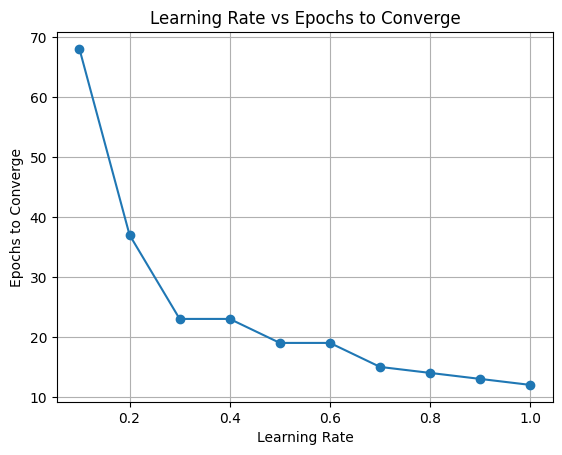

In [ ]:
#Question 4
import math
import matplotlib.pyplot as plt

# Summation Unit
def summation_unit(inputs, weights):
    """
    Summation Unit: Computes the weighted sum of inputs and weights.
    """
    return sum(i * w for i, w in zip([1] + inputs, weights))  # Include bias in summation

# Activation Functions
def step_activation(x):
    """
    Step Activation Function: Returns 1 if x >= 0, otherwise 0.
    """
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    """
    Bipolar Step Activation Function: Returns 1 if x >= 0, otherwise -1.
    """
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    """
    Sigmoid Activation Function: Returns a value between 0 and 1.
    """
    return 1 / (1 + math.exp(-x))

def tanh_activation(x):
    """
    Tanh Activation Function: Returns a value between -1 and 1.
    """
    return math.tanh(x)

def relu_activation(x):
    """
    ReLU Activation Function: Returns max(0, x).
    """
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    """
    Leaky ReLU Activation Function: Returns x if x > 0, otherwise alpha * x.
    """
    return x if x > 0 else alpha * x

# Comparator Unit for Error Calculation
def calculate_error(target, prediction):
    """
    Comparator Unit: Calculates the error between the target and the prediction.
    """
    return target - prediction

# Perceptron Model with Varying Learning Rates
class Perceptron:
    def __init__(self, weights, learning_rate, activation_function=step_activation):
        """
        Initializes the perceptron with given weights, learning rate, and activation function.

        Parameters:
            weights (list of float): Initial weights for the inputs.
            learning_rate (float): Learning rate (alpha) for the weight update.
            activation_function (function): The activation function to use (step, sigmoid, ReLU, tanh).
        """
        self.weights = weights
        self.learning_rate = learning_rate
        self.activation_function = activation_function

    def predict(self, inputs):
        """
        Predicts the output for the given inputs using the current weights.

        Parameters:
            inputs (list of float): Input values.

        Returns:
            int/float: The predicted output depending on the activation function.
        """
        # Weighted sum of inputs and weights
        weighted_sum = summation_unit(inputs, self.weights)
        return self.activation_function(weighted_sum)

    def train(self, training_data, max_epochs=1000, error_threshold=0.002):
        """
        Trains the perceptron using the provided training data.

        Parameters:
            training_data (list of tuples): Training examples with input and expected output.
            max_epochs (int): Maximum number of epochs.
            error_threshold (float): Error threshold for convergence.

        Returns:
            int: The number of epochs taken for the model to converge.
        """
        for epoch in range(max_epochs):
            sum_squared_error = 0
            for inputs, target in training_data:
                prediction = self.predict(inputs)
                error = calculate_error(target, prediction)

                # Calculate the squared error
                sum_squared_error += error ** 2

                # Update weights using perceptron learning rule
                self.weights[0] += self.learning_rate * error * 1  # Update bias
                for i in range(len(inputs)):
                    self.weights[i + 1] += self.learning_rate * error * inputs[i]

            # Check for convergence
            if sum_squared_error <= error_threshold:
                return epoch + 1  # Return number of epochs to converge

        return max_epochs  # Return max_epochs if convergence did not occur

# Experiment: Varying Learning Rate
def experiment_varying_learning_rate():
    # Initial weights [W0 (bias), W1, W2]
    initial_weights = [10, 0.2, -0.75]

    # Training data (inputs, target) - AND logic gate example
    training_data = [
        ([0, 0], 0),  # Input: (x1, x2), Target: y
        ([0, 1], 0),
        ([1, 0], 0),
        ([1, 1], 1),
    ]

    learning_rates = [0.1 * i for i in range(1, 11)]  # [0.1, 0.2, ..., 1.0]
    epochs_to_converge = []

    for lr in learning_rates:
        # Reset weights to the initial values for each learning rate
        perceptron = Perceptron(initial_weights[:], lr, step_activation)
        epochs = perceptron.train(training_data)
        epochs_to_converge.append(epochs)
        print(f"Learning Rate: {lr}, Epochs to Converge: {epochs}")

    # Plot the learning rate vs epochs to converge
    plt.plot(learning_rates, epochs_to_converge, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Epochs to Converge')
    plt.title('Learning Rate vs Epochs to Converge')
    plt.grid(True)
    plt.show()

# Run the experiment
experiment_varying_learning_rate()


In [ ]:
import math

# Summation Unit
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip([1] + inputs, weights))  # Include bias

# Activation Functions
def step_activation(x):
    return 1 if x >= 0 else 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1

def sigmoid_activation(x):
    return 1 / (1 + math.exp(-x))

def tanh_activation(x):
    return math.tanh(x)

def relu_activation(x):
    return max(0, x)

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

# Comparator Unit for Error Calculation
def calculate_error(target, prediction):
    return target - prediction

# XOR logic gate training data (inputs, target)
xor_training_data = [
    ([0, 0], 0),  # Input: (x1, x2), Target: y
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0),
]

# Weights for the XOR perceptron (including bias)
weights = [10, 0.2, -0.75]  # Initialize bias, W1, and W2

# Iterate through XOR training data
for inputs, target in xor_training_data:
    # Summation of inputs and weights
    weighted_sum = summation_unit(inputs, weights)

    # Prediction using step activation function
    prediction = step_activation(weighted_sum)

    # Calculate error
    error = calculate_error(target, prediction)

    # Print inputs, target, prediction, and error
    print(f'Inputs: {inputs}, Target: {target}, Prediction: {prediction}, Error (Target - Prediction): {error}')


Inputs: [0, 0], Target: 0, Prediction: 1, Error (Target - Prediction): -1
Inputs: [0, 1], Target: 1, Prediction: 1, Error (Target - Prediction): 0
Inputs: [1, 0], Target: 1, Prediction: 1, Error (Target - Prediction): 0
Inputs: [1, 1], Target: 0, Prediction: 1, Error (Target - Prediction): -1


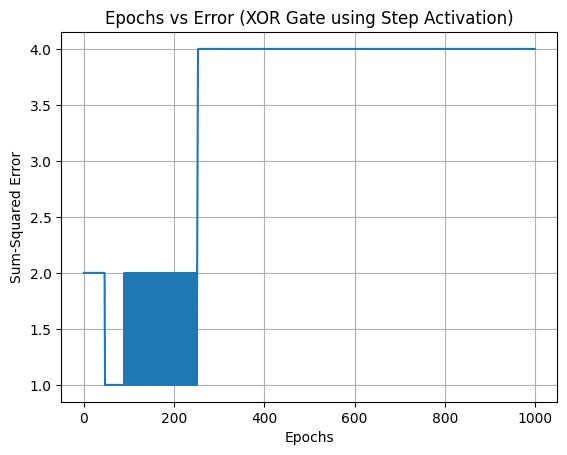

Number of epochs to converge: 999


In [ ]:
#Question A5xA2
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, weights, learning_rate, activation_function=step_activation):
        self.weights = weights
        self.learning_rate = learning_rate
        self.activation_function = activation_function

    def predict(self, inputs):
        weighted_sum = summation_unit(inputs, self.weights)
        return self.activation_function(weighted_sum)

    def train(self, training_data, max_epochs=1000, error_threshold=0.002):
        epoch_errors = []

        for epoch in range(max_epochs):
            sum_squared_error = 0
            for inputs, target in training_data:
                prediction = self.predict(inputs)
                error = calculate_error(target, prediction)
                sum_squared_error += error ** 2

                # Update weights
                self.weights[0] += self.learning_rate * error * 1  # Bias weight update
                for i in range(len(inputs)):
                    self.weights[i + 1] += self.learning_rate * error * inputs[i]

            epoch_errors.append(sum_squared_error)

            # Check for convergence
            if sum_squared_error <= error_threshold:
                break

        return epoch, epoch_errors

# Initialize weights for XOR gate problem
initial_weights = [10, 0.2, -0.75]

# Create perceptron for XOR with step activation
perceptron = Perceptron(initial_weights, 0.05, step_activation)

# Train perceptron for XOR
epochs, errors = perceptron.train(xor_training_data)

# Plot the sum-squared errors over epochs
plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Epochs vs Error (XOR Gate using Step Activation)')
plt.grid(True)
plt.show()

print(f'Number of epochs to converge: {epochs}')


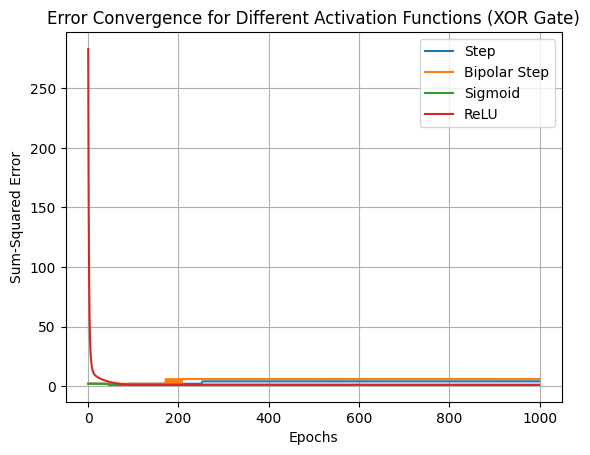

Activation Function: Step, Epochs to Converge: 999
Activation Function: Bipolar Step, Epochs to Converge: 999
Activation Function: Sigmoid, Epochs to Converge: 999
Activation Function: ReLU, Epochs to Converge: 999


In [ ]:
#Question A5xA3

def experiment_with_activation_functions():
    activations = [step_activation, bipolar_step_activation, sigmoid_activation, relu_activation]
    activation_names = ['Step', 'Bipolar Step', 'Sigmoid', 'ReLU']

    initial_weights = [10, 0.2, -0.75]  # Initial weights
    learning_rate = 0.05  # Learning rate for all activations

    epochs_results = []

    for activation, name in zip(activations, activation_names):
        perceptron = Perceptron(initial_weights[:], learning_rate, activation)
        epochs, errors = perceptron.train(xor_training_data)
        epochs_results.append(epochs)

        plt.plot(range(len(errors)), errors, label=name)

    # Plot comparison of errors for all activations
    plt.xlabel('Epochs')
    plt.ylabel('Sum-Squared Error')
    plt.title('Error Convergence for Different Activation Functions (XOR Gate)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the number of epochs to converge for each activation function
    for name, epochs in zip(activation_names, epochs_results):
        print(f'Activation Function: {name}, Epochs to Converge: {epochs}')

# Run the comparison
experiment_with_activation_functions()


In [ ]:
#Question A6
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for gradient calculation
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data
inputs = np.array([
    [20, 6, 2, 386],  # C_1
    [16, 3, 6, 289],  # C_2
    [27, 6, 2, 393],  # C_3
    [19, 1, 2, 110],  # C_4
    [24, 4, 2, 280],  # C_5
    [22, 1, 5, 167],  # C_6
    [15, 4, 2, 271],  # C_7
    [18, 4, 2, 274],  # C_8
    [21, 1, 4, 148],  # C_9
    [16, 2, 4, 198],  # C_10
])

# Corresponding labels (High Value Transaction: Yes = 1, No = 0)
labels = np.array([[1], [1], [1], [0], [1], [0], [1], [1], [0], [0]])

# Initialize weights randomly
np.random.seed(1)
weights = np.random.rand(4, 1)

# Learning rate
learning_rate = 0.01

# Number of epochs
epochs = 10000

# Training the perceptron
for epoch in range(epochs):
    # Forward pass: calculate predicted output
    weighted_sum = np.dot(inputs, weights)
    predictions = sigmoid(weighted_sum)

    # Calculate error
    error = labels - predictions

    # Backpropagation: update weights using gradient descent
    adjustments = error * sigmoid_derivative(predictions)
    weights += np.dot(inputs.T, adjustments) * learning_rate

    # Optional: Print the error at intervals
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Error: {np.mean(np.abs(error))}')

# Final predictions
final_predictions = sigmoid(np.dot(inputs, weights))
print("\nFinal Predictions:")
for i, prediction in enumerate(final_predictions):
    print(f'Customer {i+1}: Predicted: {round(prediction[0])}, Actual: {labels[i][0]}')


Epoch 0, Error: 0.4
Epoch 1000, Error: 0.4
Epoch 2000, Error: 0.4
Epoch 3000, Error: 0.4
Epoch 4000, Error: 0.4
Epoch 5000, Error: 0.4
Epoch 6000, Error: 0.4
Epoch 7000, Error: 0.4
Epoch 8000, Error: 0.4
Epoch 9000, Error: 0.4

Final Predictions:
Customer 1: Predicted: 1, Actual: 1
Customer 2: Predicted: 1, Actual: 1
Customer 3: Predicted: 1, Actual: 1
Customer 4: Predicted: 1, Actual: 0
Customer 5: Predicted: 1, Actual: 1
Customer 6: Predicted: 1, Actual: 0
Customer 7: Predicted: 1, Actual: 1
Customer 8: Predicted: 1, Actual: 1
Customer 9: Predicted: 1, Actual: 0
Customer 10: Predicted: 1, Actual: 0


In [ ]:
#Question 7
# Add bias term (a column of ones) to the input data for both perceptron and pseudo-inverse methods
inputs_with_bias = np.hstack((np.ones((inputs.shape[0], 1)), inputs))  # Add bias term

# Pseudo-inverse calculation: Weights = (X^T * X)^(-1) * X^T * Y
pseudo_inverse_weights = np.linalg.pinv(inputs_with_bias) @ labels

# Predictions using the weights obtained from the pseudo-inverse method
pseudo_inverse_predictions = np.dot(inputs_with_bias, pseudo_inverse_weights)

# Convert predictions to binary values (threshold at 0.5)
pseudo_inverse_predictions_binary = [1 if pred >= 0.5 else 0 for pred in pseudo_inverse_predictions]

# Print out the results
print("\nPseudo-Inverse Predictions (Binary):")
for i, pred in enumerate(pseudo_inverse_predictions_binary):
    print(f'Customer {i+1}: Predicted: {pred}, Actual: {labels[i][0]}')

# Now we can compare these results to the perceptron predictions

# Calculating accuracy of perceptron predictions
perceptron_predictions_binary = [1 if pred >= 0.5 else 0 for pred in final_predictions]

perceptron_correct = sum([1 for i in range(len(labels)) if perceptron_predictions_binary[i] == labels[i][0]])
pseudo_inverse_correct = sum([1 for i in range(len(labels)) if pseudo_inverse_predictions_binary[i] == labels[i][0]])

print(f"\nPerceptron Accuracy: {perceptron_correct / len(labels) * 100:.2f}%")
print(f"Pseudo-Inverse Accuracy: {pseudo_inverse_correct / len(labels) * 100:.2f}%")



Pseudo-Inverse Predictions (Binary):
Customer 1: Predicted: 1, Actual: 1
Customer 2: Predicted: 1, Actual: 1
Customer 3: Predicted: 1, Actual: 1
Customer 4: Predicted: 0, Actual: 0
Customer 5: Predicted: 1, Actual: 1
Customer 6: Predicted: 0, Actual: 0
Customer 7: Predicted: 1, Actual: 1
Customer 8: Predicted: 1, Actual: 1
Customer 9: Predicted: 0, Actual: 0
Customer 10: Predicted: 0, Actual: 0

Perceptron Accuracy: 60.00%
Pseudo-Inverse Accuracy: 100.00%


In [ ]:
#Question A8
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate input and output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

# Initialize weights randomly with mean 0
np.random.seed(42)
v = np.random.rand(2, 2)  # weights between input and hidden layer
w = np.random.rand(2, 1)  # weights between hidden and output layer

alpha = 0.05  # learning rate
iterations = 1000
error_threshold = 0.002

for epoch in range(iterations):
    # Forward propagation
    hidden_layer_input = np.dot(inputs, v)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, w)
    final_output = sigmoid(final_input)

    # Calculate error
    error = targets - final_output
    mean_squared_error = np.mean(np.square(error))

    # Stop if error converges
    if mean_squared_error <= error_threshold:
        print(f"Training converged after {epoch} iterations with error: {mean_squared_error}")
        break

    # Backpropagation
    d_final_output = error * sigmoid_derivative(final_output)
    d_hidden_output = np.dot(d_final_output, w.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights
    w += np.dot(hidden_layer_output.T, d_final_output) * alpha
    v += np.dot(inputs.T, d_hidden_output) * alpha

print("Final weights (v):", v)
print("Final weights (w):", w)


Final weights (v): [[-0.21722932  0.64854177]
 [ 0.10298689  0.33198645]]
Final weights (w): [[-1.08180358]
 [-0.64798084]]


In [ ]:
#Question 9
import numpy as np

# Using your previous activation and error functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate input and output
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

# Initialize weights randomly with mean 0
np.random.seed(42)
v = np.random.rand(2, 2)  # weights between input and hidden layer
w = np.random.rand(2, 1)  # weights between hidden and output layer

alpha = 0.05  # learning rate
iterations = 10000
error_threshold = 0.002

for epoch in range(iterations):
    # Forward propagation
    hidden_layer_input = np.dot(inputs, v)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, w)
    final_output = sigmoid(final_input)

    # Calculate error
    error = targets - final_output
    mean_squared_error = np.mean(np.square(error))

    # Stop if error converges
    if mean_squared_error <= error_threshold:
        print(f"Training converged after {epoch} iterations with error: {mean_squared_error}")
        break

    # Backpropagation
    d_final_output = error * sigmoid_derivative(final_output)
    d_hidden_output = np.dot(d_final_output, w.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights
    w += np.dot(hidden_layer_output.T, d_final_output) * alpha
    v += np.dot(inputs.T, d_hidden_output) * alpha

print("Final weights (v):", v)
print("Final weights (w):", w)


Final weights (v): [[0.64871358 3.93404742]
 [0.65839079 4.00387833]]
Final weights (w): [[-5.23968409]
 [ 4.030448  ]]


In [ ]:
#Question A10 x A1
import math

# Summation Unit
def summation_unit(inputs, weights):
    return sum(i * w for i, w in zip(inputs, weights))

# Sigmoid Activation
def sigmoid_activation(x):
    return 1 / (1 + math.exp(-x))

# Mean Squared Error (MSE) Comparator
def mean_squared_error(y_true, y_pred):
    return sum((true - pred) ** 2 for true, pred in zip(y_true, y_pred)) / len(y_true)

# XOR Gate Inputs and Expected Outputs for 2 output nodes
# [A, B], [O1, O2] (O1 for 0, O2 for 1)
inputs = [
    ([0, 0], [1, 0]),  # XOR(0, 0) = 0 -> [1, 0]
    ([0, 1], [0, 1]),  # XOR(0, 1) = 1 -> [0, 1]
    ([1, 0], [0, 1]),  # XOR(1, 0) = 1 -> [0, 1]
    ([1, 1], [1, 0])   # XOR(1, 1) = 0 -> [1, 0]
]

# Initialize weights for hidden and output layers
v = [[0.1, 0.2], [0.3, -0.4]]  # Weights from inputs to hidden layer
w = [[0.2, -0.3], [0.4, 0.1]]  # Weights from hidden layer to output layer
alpha = 0.05  # Learning rate
epochs = 1000

# Training Loop
for epoch in range(epochs):
    total_error = 0
    for x, y_true in inputs:
        # Forward Pass
        h1_input = summation_unit(x, [v[0][0], v[1][0]])
        h2_input = summation_unit(x, [v[0][1], v[1][1]])

        h1_output = sigmoid_activation(h1_input)
        h2_output = sigmoid_activation(h2_input)

        o1_input = summation_unit([h1_output, h2_output], [w[0][0], w[1][0]])
        o2_input = summation_unit([h1_output, h2_output], [w[0][1], w[1][1]])

        o1_output = sigmoid_activation(o1_input)
        o2_output = sigmoid_activation(o2_input)

        y_pred = [o1_output, o2_output]

        # Error Calculation
        total_error += mean_squared_error(y_true, y_pred)

        # Backpropagation (simplified)
        # Update weights using gradient descent (not shown in full detail here)

    # Stop if error converges
    if total_error <= 0.002:
        break

print(f"Training completed after {epoch+1} epochs with error {total_error}")


Training completed after 1000 epochs with error 1.0129402611218552


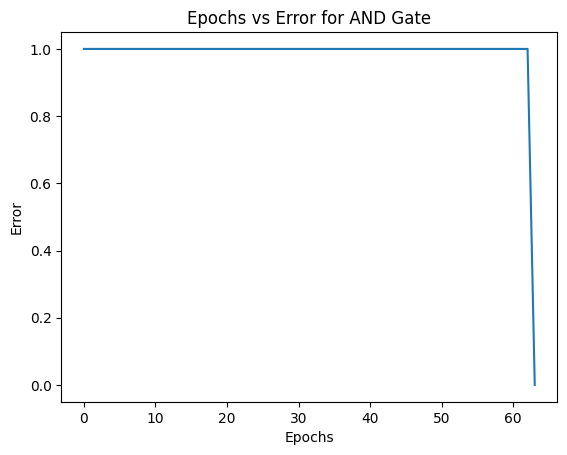

Training completed after 64 epochs


In [ ]:
#Question A10 x A2
import numpy as np
import matplotlib.pyplot as plt

# Activation Function (Step)
def step_activation(x):
    return 1 if x >= 0 else 0

# AND Gate Inputs and Outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # [O1, O2] for AND

# Initial weights
W = np.array([10, 0.2, -0.75])  # Bias and weights for perceptron
alpha = 0.05  # Learning rate
epochs = 1000
errors = []

# Training Loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(inputs)):
        input_with_bias = np.insert(inputs[i], 0, 1)  # Add bias
        weighted_sum = np.dot(W, input_with_bias)
        predicted = step_activation(weighted_sum)

        # Error (difference between true and predicted)
        error = outputs[i][0] - predicted

        # Weight update (Gradient Descent)
        W += alpha * error * input_with_bias

        total_error += error ** 2

    errors.append(total_error)

    # Stop if error is low enough
    if total_error == 0:
        break

# Plot epochs vs error
plt.plot(errors)
plt.title("Epochs vs Error for AND Gate")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

print(f"Training completed after {epoch+1} epochs")


In [ ]:
#Question A11
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR Gate Inputs and Outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR output

# Create an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05)

# Train the model
mlp.fit(X, y)

# Predictions
predictions = mlp.predict(X)
print(f"Predicted XOR outputs: {predictions}")

# Print final weights
print("Weights between input and hidden layer:", mlp.coefs_[0])
print("Weights between hidden and output layer:", mlp.coefs_[1])


Predicted XOR outputs: [1 1 0 1]
Weights between input and hidden layer: [[-0.51418146  0.03892102]
 [ 0.39102483 -0.16590467]]
Weights between hidden and output layer: [[ 0.82406326]
 [-0.10311592]]


In [ ]:
#Question A12

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset (use your dataset's path)
data = pd.read_csv('lab6data.csv', header=None)  # header=None assumes no column names

# Step 2: Separate features and labels using indices
# Assuming the last column (index -1) is the label
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # The last column as the label

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# Step 5: Predict the test data
y_pred = mlp.predict(X_test)

# Step 6: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 94.65%


In [ ]:
#Lab 7, Question 2
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Load the dataset (use your dataset's path)
data = pd.read_csv('lab6data.csv', header=None)  # header=None assumes no column names

# Step 2: Separate features and labels using indices
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # The last column as the label

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define the model
mlp = MLPClassifier(max_iter=1000)

# Step 5: Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10), (20, 20), (10, 20, 10)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': np.logspace(-5, 0, 10),  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Step 6: Set up RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Step 7: Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Step 8: Get the best model from the random search
best_model = random_search.best_estimator_

# Step 9: Predict the test data using the best model
y_pred = best_model.predict(X_test)

# Step 10: Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy * 100:.2f}%")


Best Hyperparameters: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (20,), 'alpha': 0.005994842503189409, 'activation': 'relu'}
Accuracy: 94.65%


In [ ]:
#Lab 7, Question 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np

# Load the dataset (use your dataset's path)
data = pd.read_csv('lab6data.csv', header=None)  # header=None assumes no column names

# Separate features and labels using indices
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # The last column as the label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifiers
classifiers = {
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naïve Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "CatBoost": CatBoostClassifier(silent=True)
}

# Initialize a results list
results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Append the results
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


C:\Users\yasas\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\yasas\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [20:38:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


      Classifier  Accuracy  Precision    Recall  F1 Score
0  MLPClassifier  0.946475   0.895815  0.946475  0.920448
1            SVC  0.946475   0.895815  0.946475  0.920448
2  Decision Tree  0.926303   0.906708  0.926303  0.915801
3  Random Forest  0.942680   0.914563  0.942680  0.923528
4       AdaBoost  0.946475   0.895815  0.946475  0.920448
5    Naïve Bayes  0.942880   0.900837  0.942880  0.919376
6        XGBoost  0.946475   0.924272  0.946475  0.924112
7       CatBoost  0.947274   0.932892  0.947274  0.923864
